Problem Statement: 

Build a model to predict a country’s happiness score based on features provided 
The model will show the relative importance of each indicator
Define and visualize general trends in global happiness


Dictionary:

Features	                        Note

Country  - str	                    158 countries and regions
Region - str	                    Subcontinental division
Happiness Rank - int	            1 to 158
Happiness Score - float	            1 to 10 ( historic top score is around 7.5)
Economy (GDP per capita) - float	Range from 0.0 (DRCongo) to 1.7 (Qatar)
Family – float	                    “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” Range: 0.0 to 1.4
Health (Life Expectancy) - float	 Range: 0.0 (Sierra Leone) to 1.02 (Singapore) 
Freedom - float	                     “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?” Range: 0 (Iraq) to 0.67(Norway)
Generosity - float	                 “Have you donated money to a charity in the past month?” 
	0 (Greece) to 0.8 (Myanmar)
Trust (Government Corruption) - float Is corruption widespread throughout the government/business or not?
	0 (Indonesia) to 0.55 (Rwanda)
Dystopia Residual - float	         Unexplained factor that differ for each country, reflecting the extent to which the six variables over or under-explain the happiness score.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# 1. Load and clean Data

In [3]:
 df= pd.read_csv('C:/Users/brizeng/Desktop/gads/Final Project/2015.csv')
 df16 = pd.read_csv('C:/Users/brizeng/Desktop/gads/Final Project/2016.csv')
 df17= pd.read_csv('C:/Users/brizeng/Desktop/gads/Final Project/2017.csv')

In [79]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
#2017 data have slightly different feature name and is missing "Region", making adjustments so all 3 datasets have uniform features.

df17 = pd.merge(df17, df16.loc[:, ['Country', 'Region']], on='Country')
df17.rename(columns={'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                       'Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual'}, inplace=True)

In [117]:
df17.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region,Happiness Change
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe,-0.050
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe,-0.039
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe,-0.023
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe,-0.028
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe,0.042


Series([], Name: Country, dtype: object)


In [82]:
df.shape

(158, 12)

In [83]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
df.groupby('Region')['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)'].mean().sort_values(by="Happiness Score", ascending=False)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita)
Region,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880
North America,10.000000,7.273000,0.036960,1.360400
Western Europe,29.523810,6.689619,0.037625,1.298596
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815
Eastern Asia,64.500000,5.626167,0.037225,1.151780
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438
Southeastern Asia,81.222222,5.317444,0.042691,0.789054
Southern Asia,113.142857,4.580857,0.032161,0.560486


In [6]:
df['year'] = 2015
df16['year'] = 2016
df17['year'] = 2017

In [9]:

dfall = df.copy()
dfall = dfall.append(df16, ignore_index=True)
dfall = dfall.append(df17, ignore_index=True)
dfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 17 columns):
Country                          465 non-null object
Dystopia Residual                465 non-null float64
Economy (GDP per Capita)         465 non-null float64
Family                           465 non-null float64
Freedom                          465 non-null float64
Generosity                       465 non-null float64
Happiness Rank                   465 non-null int64
Happiness Score                  465 non-null float64
Health (Life Expectancy)         465 non-null float64
Lower Confidence Interval        157 non-null float64
Region                           465 non-null object
Standard Error                   158 non-null float64
Trust (Government Corruption)    465 non-null float64
Upper Confidence Interval        157 non-null float64
Whisker.high                     150 non-null float64
Whisker.low                      150 non-null float64
year                             46

In [11]:
#dropping all calculation fields
dfall = dfall.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Standard Error','Happiness Change','Whisker.high','Whisker.low'])
dfall.describe()

ValueError: labels ['Happiness Change'] not contained in axis

In [12]:
dfall.head(20)

,Country,Dystopia Residual,Economy (GDP per Capita),Family,Freedom,Generosity,Happiness Rank,Happiness Score,Health (Life Expectancy),Lower Confidence Interval,Region,Standard Error,Trust (Government Corruption),Upper Confidence Interval,Whisker.high,Whisker.low,year
0,Switzerland,2.51738,1.39651,1.34951,0.66557,0.29678,1,7.587,0.94143,NaN,Western Europe,0.03411,0.41978,NaN,NaN,NaN,2015
1,Iceland,2.70201,1.30232,1.40223,0.62877,0.43630,2,7.561,0.94784,NaN,Western Europe,0.04884,0.14145,NaN,NaN,NaN,2015
2,Denmark,2.49204,1.32548,1.36058,0.64938,0.34139,3,7.527,0.87464,NaN,Western Europe,0.03328,0.48357,NaN,NaN,NaN,2015
3,Norway,2.46531,1.45900,1.33095,0.66973,0.34699,4,7.522,0.88521,NaN,Western Europe,0.03880,0.36503,NaN,NaN,NaN,2015
4,Canada,2.45176,1.32629,1.32261,0.63297,0.45811,5,7.427,0.90563,NaN,North America,0.03553,0.32957,NaN,NaN,NaN,2015
5,Finland,2.61955,1.29025,1.31826,0.64169,0.23351,6,7.406,0.88911,NaN,Western Europe,0.03140,0.41372,NaN,NaN,NaN,2015
6,Netherlands,2.46570,1.32944,1.28017,0.61576,0.47610,7,7.378,0.89284,NaN,Western Europe,0.02799,0.31814,NaN,NaN,NaN,2015
7,Sweden,2.37119,1.33171,1.28907,0.65980,0.36262,8,7.364,0.91087,NaN,Western Europe,0.03157,0.43844,NaN,NaN,NaN,2015
8,New Zealand,2.26425,1.25018,1.31967,0.63938,0.47501,9,7.286,0.90837,NaN,Australia and New Zealand,0.03371,0.42922,NaN,NaN,NaN,2015
9,Australia,2.26646,1.33358,1.30923,0.65124,0.43562,10,7.284,0.93156,NaN,Australia and New Zealand,0.04083,0.35637,NaN,NaN,NaN,2015


# 2. EDA - Initial Data Visualization

<IPython.core.display.Javascript object>


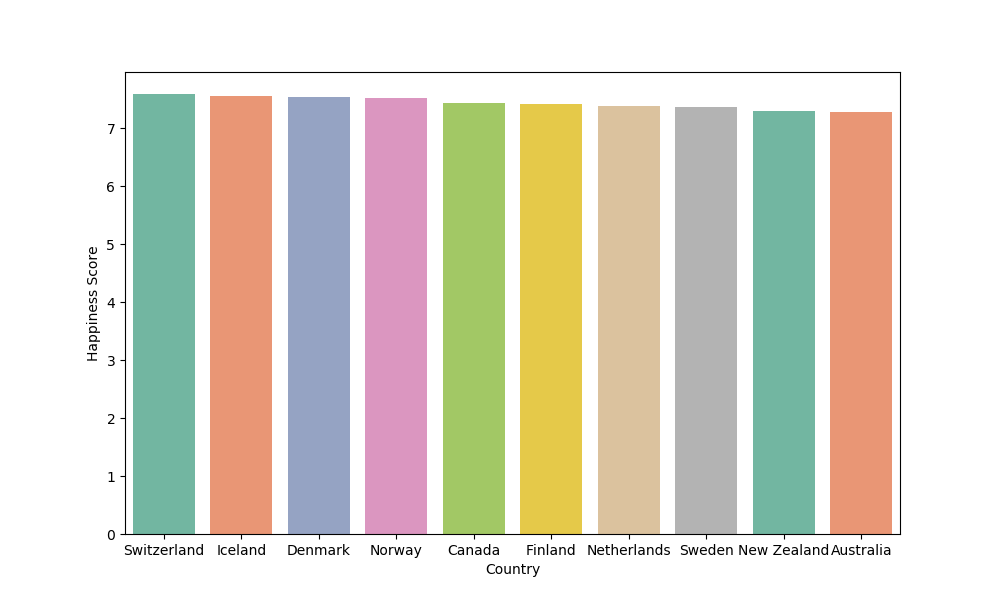

[Text(0,0.5,'Happiness Score'), Text(0.5,0,'Country')]

In [13]:
#first let's take a look at some of the top winners in 2015
plt.figure(figsize=(10,6))
top10=df.sort_values(by=['Happiness Rank'],ascending=True).head(10)
ax=sns.barplot(x='Country',y='Happiness Score', data=top10, palette = 'Set2')
ax.set(xlabel='Country', ylabel='Happiness Score')

<IPython.core.display.Javascript object>


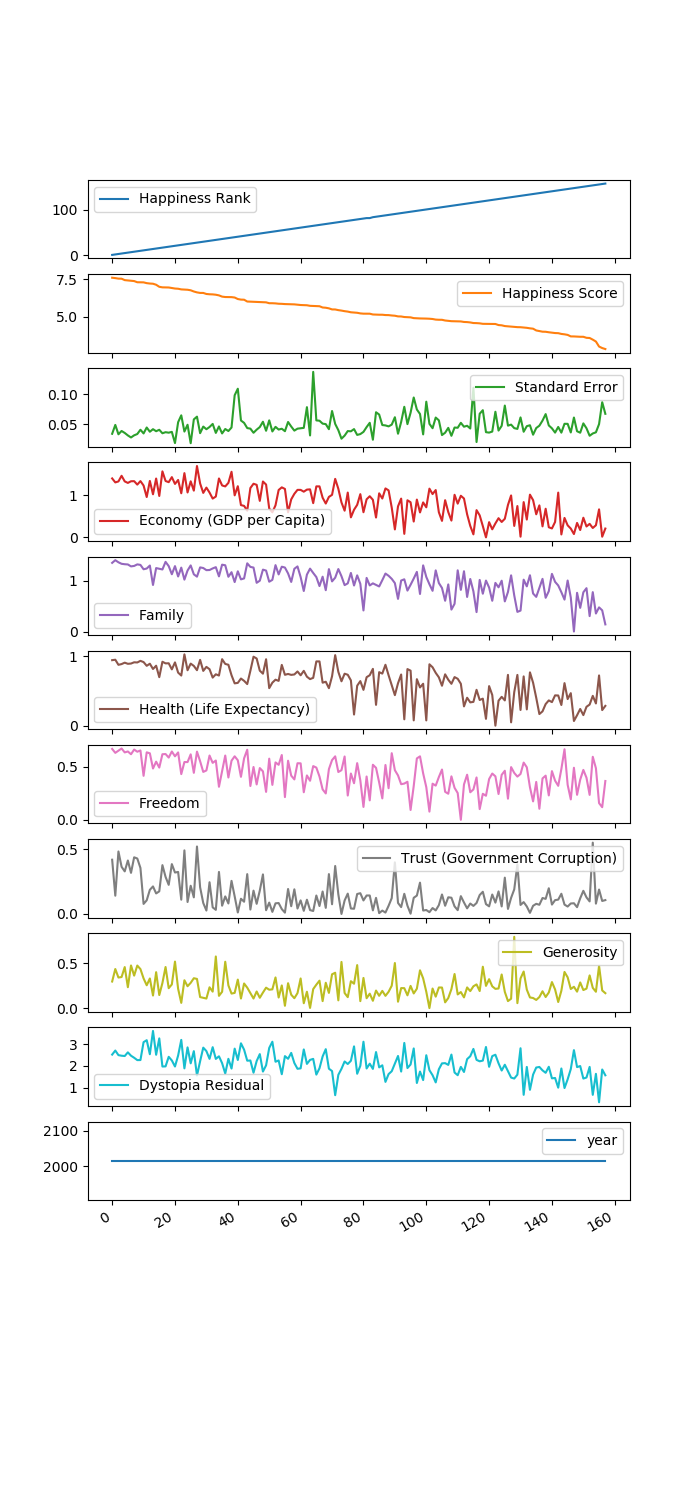

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000242603D68D0>,
      dtype=object)

In [14]:
#By visually inspecting, Corruption, and Generosity does not display 
#high correlation with happiness score, GDP per Capita, Life Expectancy are more correlated

df.plot(subplots=True, figsize=(7, 15))

<IPython.core.display.Javascript object>


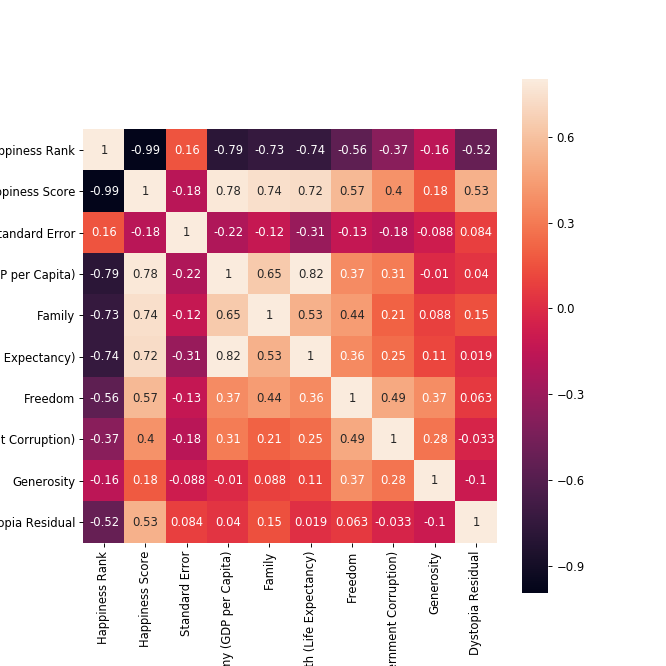

In [72]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=0.8, annot=True, square=True);

<IPython.core.display.Javascript object>


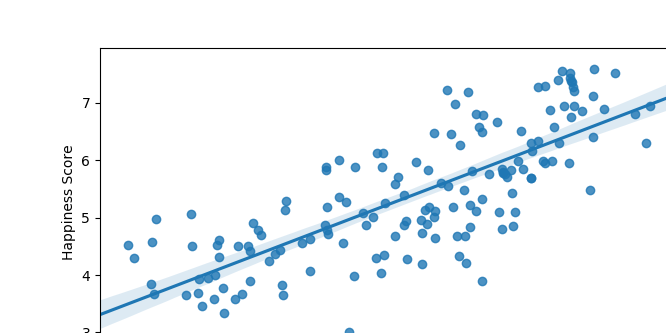

<IPython.core.display.Javascript object>


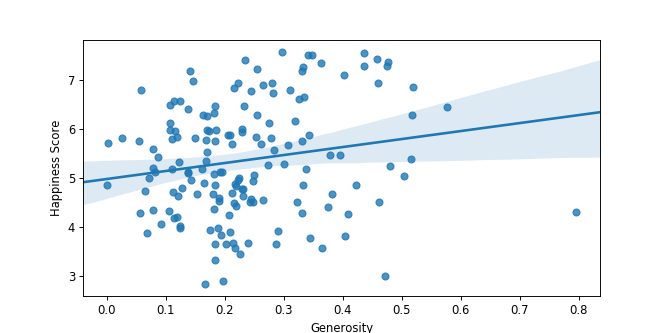

<IPython.core.display.Javascript object>


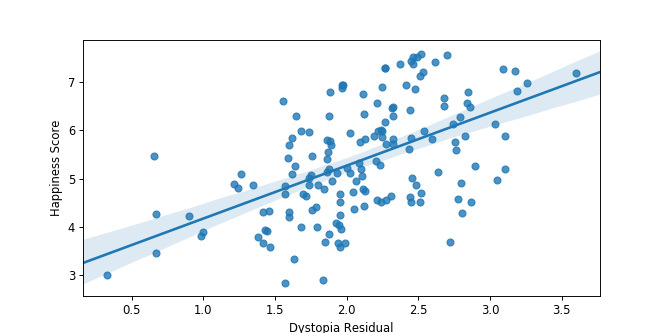

In [57]:
#No linear relationship in Generosity, Dystopia Residual
plt.figure(figsize=(8,4))
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score' ,data=df)
plt.figure(figsize=(8,4))
sns.regplot(x='Generosity',y='Happiness Score' ,data=df)
plt.figure(figsize=(8,4))
sns.regplot(x='Dystopia Residual',y='Happiness Score' ,data=df)

<IPython.core.display.Javascript object>


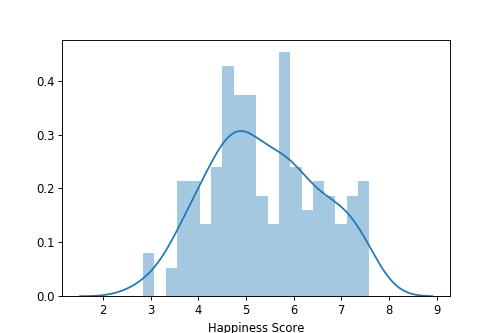

In [58]:
#High number of countries concentrated between 4-6 score
plt.figure(figsize=(6,4))
sns.distplot(df['Happiness Score'],kde=True, bins = 20)
plt.show()

# 3. Regional Data 

In [105]:
#use choromap function to display a ranking heatmap 
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Rank'], 
           text = df['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

<IPython.core.display.Javascript object>


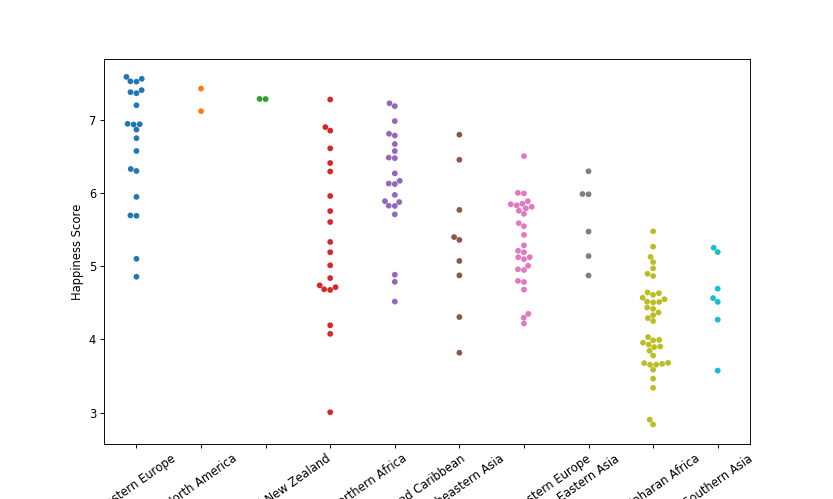

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [101]:
#swarmplot indicates score distribution amount each subcontinental regions
fig, axes = plt.subplots(figsize = (10, 6))
sns.swarmplot(x="Region", y="Happiness Score",  data=df, ax = axes)
plt.xticks(rotation=35)

<IPython.core.display.Javascript object>


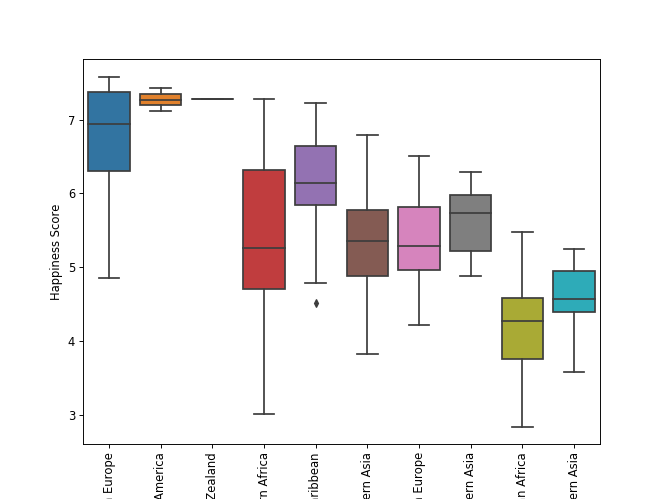

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

In [64]:
#box plot does a good job visualizing standard distribution of each regions
fig, axes = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Region', y='Happiness Score', data = df)
plt.xticks(rotation=90)

<IPython.core.display.Javascript object>


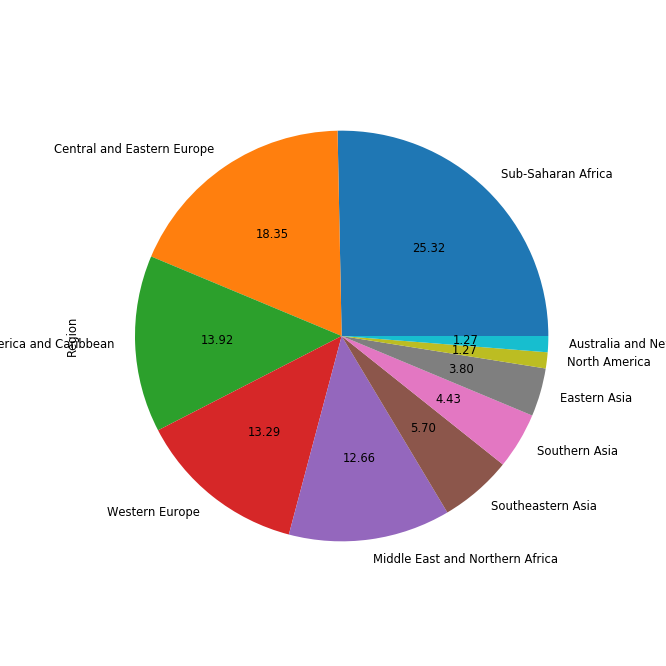

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C1E33EFD0>],
      dtype=object)

In [92]:

#Percantage on country's regional listing #Percant 
df['Region'].value_counts().plot.pie(subplots=True, figsize=(8, 8), autopct='%.2f')

# 4. Rank Change Over Time

In [15]:
#Utilzing combined dataset of 2015 - 2017 data, calculating the correlation of rank change from 2015 to 2017
rank_by_year_correlation = dfall[['Country', 'Happiness Score', 'year']] \
    .groupby(['Country']).corr().ix[0::2,'year'].reset_index(name='correlation') \
    [['Country', 'correlation']]
rank_by_year_correlation.head(20)

C:\Users\brizeng\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



,Country,correlation
0,Afghanistan,0.504601
1,Albania,-0.880998
2,Algeria,0.351179
3,Angola,-0.973939
4,Argentina,0.322712
5,Armenia,0.991241
6,Australia,-0.000002
7,Austria,-0.995496
8,Azerbaijan,0.269798
9,Bahrain,0.492228


In [136]:
#plotting that correlation on choromap function, indicating a positive score shift in central Europe, Middle East, Chins
#Russia, while Western Europe, both Americas, and Subsaharan Africa saw a neagtive score shift.
data = dict(type = 'choropleth', locations = rank_by_year_correlation['Country'],
           locationmode = 'country names', z = rank_by_year_correlation['correlation'], 
           text = rank_by_year_correlation['Country'], colorbar = {'title':'Change of happiness'})

layout = dict(geo = dict(showframe = False, projection = {'type': 'Mercator'}))

choromap = go.Figure(data=[data], layout=layout)
iplot(choromap)

# 5. Modeling to predict Happiness

In [25]:
#First model includes all non-string features
X1 = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region',], axis=1)
y1 = df['Happiness Score']

In [26]:
#Test and Train
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33)

In [27]:
#Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X1_train = scaler.transform(X_train)
X1_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-0.09077727  0.48597918  0.9325023   0.6029687   1.38497359  0.        ]
 [-1.06302698  1.06871169  1.1844336   1.01082648  0.97364634  0.        ]
 [-0.75457548 -1.22116074 -0.44799344 -0.2717157  -0.28661703  0.        ]
 [-0.81732257  1.03801694  0.97621165  1.2377344   0.19775905  0.        ]]


In [32]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y1_pred = lm.predict(X1_test)

In [41]:

result_lm = pd.DataFrame({
    'Actual':y1_test,
    'Predict':y1_pred
})
result_lm['Diff'] = y1_test - y1_pred
result_lm.head(10)

,Actual,Predict,Diff
44,5.995,5.014915,0.980085
30,6.505,5.545290,0.959710
19,6.901,5.330848,1.570152
66,5.689,5.440331,0.248669
134,4.194,5.452495,-1.258495
6,7.378,5.078186,2.299814
133,4.218,5.533975,-1.315975
98,4.876,5.150264,-0.274264
11,7.226,5.340624,1.885376
32,6.477,5.199817,1.277183


In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1.1482705246159446
MSE: 1.7622441824102235
RMSE: 1.3274954547606646


In [ ]:
# With all features included, RMSE score is over 1.3, which is not a very predictive model

In [16]:
#Dropping low correlation features, keeping Family(social support), GDP, and Health
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region','Freedom', 'Trust (Government Corruption)',
       'Generosity'], axis=1)
y = df['Happiness Score']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print('Standardized features\n')
print(str(X_train[:4]))

Standardized features

[[-0.09077727  0.48597918  0.9325023   0.6029687   1.38497359  0.        ]
 [-1.06302698  1.06871169  1.1844336   1.01082648  0.97364634  0.        ]
 [-0.75457548 -1.22116074 -0.44799344 -0.2717157  -0.28661703  0.        ]
 [-0.81732257  1.03801694  0.97621165  1.2377344   0.19775905  0.        ]]


In [19]:
#Scale and Fit the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [40]:
#The mean of difference in this pred set is significantly lower than the all feature version
result_lm = pd.DataFrame({
    'Actual':y_test,
    'Predict':y_pred
})
result_lm['Diff'] = y_test - y_pred
result_lm.head(10)

,Actual,Predict,Diff
11,7.226,5.014915,2.211085
96,4.898,5.545290,-0.647290
107,4.715,5.330848,-0.615848
109,4.686,5.440331,-0.754331
112,4.642,5.452495,-0.810495
20,6.867,5.078186,1.788814
143,3.845,5.533975,-1.688975
33,6.455,5.150264,1.304736
39,6.269,5.340624,0.928376
61,5.759,5.199817,0.559183


In [21]:
#RMSE score saw significant reduction.
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 0.21523008798055243
MSE: 0.07867034256319201
RMSE: 0.2804823391288514


In [35]:
# Limiting features to high correlation ones ie. GDP, Health, Family, help improve the predictability of the model

In [22]:
#Fitting a Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [24]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))rtcoming: 1. Current data features are pre-defined, have no insights or creative space for additional feature engineering.# Shortcoming: 1. Current data features are pre-defined, have no insights or creative space for additional feature engineering.
             2. We haven't really have a clear idea of our hypothesis/goal.
             3. Have not yet fully-utilize the 3 years of dataset, should do more on Change over time analysis
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.3092301886792452
MSE: 0.16012782415094332
RMSE: 0.40015974828928425


In [ ]:
# Linear Regression remains the more predictive model choice over random forest